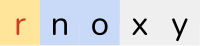
<div style="clear:both"></div>
Rafał Nowak<br/>
<a href="https://github.com/rnoxy">github.com/rnoxy</a>

# Pytorch: Dataset, Dataloader, Model, Optimizer

In [1]:
import torch
import torchvision
from torchvision.transforms import ToTensor

# Dataset

In [3]:
dataset = torchvision.datasets.MNIST(
    root="datasets/",
    download=True, 
    train=True,
    transform=ToTensor()
)

In [7]:
dataset.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [8]:
image = dataset[100][0]
image

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [11]:
image.mean()

tensor(0.0902)

In [33]:
dataset[100][1]

5

# Model

In [17]:
from torch.nn import Sequential, Linear, Tanh, Flatten 

In [18]:
model = Sequential(
    Flatten(),
    Linear(28*28, 100),
    Tanh(),
    Linear(100, 10)
)

In [31]:
for p in model.parameters():
    print(p.shape)

torch.Size([100, 784])
torch.Size([100])
torch.Size([10, 100])
torch.Size([10])


In [23]:
# TODO: Feed the model with image dataset[100][0]
logits = model( dataset[100][0].view(1, 1, 28, 28) )
logits.shape

torch.Size([1, 10])

In [24]:
logits

tensor([[ 0.0041, -0.1467, -0.0431,  0.1101,  0.0082,  0.1137,  0.2133, -0.2466,
         -0.0391,  0.0803]], grad_fn=<AddmmBackward0>)

In [27]:
# Calculate probabilities
y_pred = torch.softmax(logits, dim=1)
y_pred

tensor([[0.0991, 0.0852, 0.0945, 0.1102, 0.0995, 0.1106, 0.1221, 0.0771, 0.0949,
         0.1069]], grad_fn=<SoftmaxBackward0>)

In [28]:
# ... and predicted label
# TODO
torch.argmax( y_pred, dim=1 )

tensor([6])

# Loss

In [32]:
criterion = torch.nn.CrossEntropyLoss()

In [34]:
# Loss for single image
criterion( logits,  torch.tensor([5]) )

tensor(2.2023, grad_fn=<NllLossBackward0>)

# Optimizer

In [44]:
from torch.optim import SGD

LEARNING_RATE = 0.01

optimizer = SGD(model.parameters(), lr=LEARNING_RATE)

# Dataloader

In [45]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

# Model training

In [49]:
n_epochs = 3
for epoch in range(n_epochs):
    
    for batch_nr, batch in enumerate(dataloader):
        images, labels = batch
        
        # Forward propagation
        logits = model( images )
        
        # Cross entropy loss
        loss = criterion( logits, labels )
        
        # Backward propagation
        loss.backward()
        
        # Single step of SGD
        optimizer.step()
        
        # Zeroing gradients (for next iteration)
        optimizer.zero_grad()
        
        
        if batch_nr%10 == 0:
            with torch.no_grad():
                pred_class = torch.argmax(logits, dim=1)
                acc = torch.sum(pred_class == labels)/len(labels)

            print(f"epoch={epoch:3d}, i={batch_nr:4d}, loss={loss.item():.3f}, accuracy={acc.item():.3f}")

epoch=  0, i=   0, loss=2.309, accuracy=0.000
epoch=  0, i=  10, loss=2.331, accuracy=0.062
epoch=  0, i=  20, loss=2.245, accuracy=0.344
epoch=  0, i=  30, loss=2.258, accuracy=0.219
epoch=  0, i=  40, loss=2.146, accuracy=0.500
epoch=  0, i=  50, loss=2.111, accuracy=0.438
epoch=  0, i=  60, loss=2.143, accuracy=0.406
epoch=  0, i=  70, loss=2.069, accuracy=0.531
epoch=  0, i=  80, loss=2.016, accuracy=0.625
epoch=  0, i=  90, loss=1.994, accuracy=0.656
epoch=  0, i= 100, loss=1.963, accuracy=0.688
epoch=  0, i= 110, loss=1.922, accuracy=0.812
epoch=  0, i= 120, loss=1.918, accuracy=0.719
epoch=  0, i= 130, loss=1.890, accuracy=0.594
epoch=  0, i= 140, loss=1.779, accuracy=0.750
epoch=  0, i= 150, loss=1.862, accuracy=0.656
epoch=  0, i= 160, loss=1.785, accuracy=0.688
epoch=  0, i= 170, loss=1.775, accuracy=0.625
epoch=  0, i= 180, loss=1.743, accuracy=0.656
epoch=  0, i= 190, loss=1.681, accuracy=0.812
epoch=  0, i= 200, loss=1.690, accuracy=0.656
epoch=  0, i= 210, loss=1.726, acc

epoch=  1, i= 110, loss=0.439, accuracy=0.875
epoch=  1, i= 120, loss=0.664, accuracy=0.812
epoch=  1, i= 130, loss=0.544, accuracy=0.906
epoch=  1, i= 140, loss=0.511, accuracy=0.844
epoch=  1, i= 150, loss=0.365, accuracy=0.906
epoch=  1, i= 160, loss=0.437, accuracy=0.875
epoch=  1, i= 170, loss=0.765, accuracy=0.812
epoch=  1, i= 180, loss=0.581, accuracy=0.781
epoch=  1, i= 190, loss=0.816, accuracy=0.781
epoch=  1, i= 200, loss=0.344, accuracy=0.906
epoch=  1, i= 210, loss=0.304, accuracy=0.938
epoch=  1, i= 220, loss=0.385, accuracy=0.844
epoch=  1, i= 230, loss=0.391, accuracy=0.938
epoch=  1, i= 240, loss=0.293, accuracy=0.969
epoch=  1, i= 250, loss=0.643, accuracy=0.844
epoch=  1, i= 260, loss=0.417, accuracy=0.906
epoch=  1, i= 270, loss=0.459, accuracy=0.875
epoch=  1, i= 280, loss=0.308, accuracy=0.906
epoch=  1, i= 290, loss=0.396, accuracy=0.844
epoch=  1, i= 300, loss=0.467, accuracy=0.844
epoch=  1, i= 310, loss=0.430, accuracy=0.875
epoch=  1, i= 320, loss=0.419, acc

epoch=  2, i= 120, loss=0.392, accuracy=0.875
epoch=  2, i= 130, loss=0.338, accuracy=0.906
epoch=  2, i= 140, loss=0.573, accuracy=0.812
epoch=  2, i= 150, loss=0.368, accuracy=0.906
epoch=  2, i= 160, loss=0.391, accuracy=0.875
epoch=  2, i= 170, loss=0.292, accuracy=0.938
epoch=  2, i= 180, loss=0.672, accuracy=0.875
epoch=  2, i= 190, loss=0.501, accuracy=0.844
epoch=  2, i= 200, loss=0.332, accuracy=0.969
epoch=  2, i= 210, loss=0.334, accuracy=0.906
epoch=  2, i= 220, loss=0.263, accuracy=0.938
epoch=  2, i= 230, loss=0.405, accuracy=0.875
epoch=  2, i= 240, loss=0.294, accuracy=0.875
epoch=  2, i= 250, loss=0.291, accuracy=0.938
epoch=  2, i= 260, loss=0.616, accuracy=0.875
epoch=  2, i= 270, loss=0.352, accuracy=0.938
epoch=  2, i= 280, loss=0.249, accuracy=0.906
epoch=  2, i= 290, loss=0.288, accuracy=0.938
epoch=  2, i= 300, loss=0.216, accuracy=0.938
epoch=  2, i= 310, loss=0.336, accuracy=0.906
epoch=  2, i= 320, loss=0.386, accuracy=0.875
epoch=  2, i= 330, loss=0.431, acc

In [53]:
dataset_test = torchvision.datasets.MNIST(
    root="datasets/",
    download=True, 
    train=False,
    transform=ToTensor()
)

dataloader_test = DataLoader(dataset_test, batch_size=128, shuffle=False)

In [54]:
# model.eval()

acc = 0
for batch in dataloader_test:
    images, labels = batch
    logits = model( images )
    pred_class = torch.argmax(logits, dim=1)
    acc += torch.sum(pred_class == labels)


In [57]:
acc / len(dataset_test)

tensor(0.9156)